In [49]:
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [3]:
import pandas as pd
import json

with open('C:/Users/sukan/Documents/TUM/Courses/Winter 2018/Data Mining Praktikum/Yelp/dataset/yelp_dataset/yelp_academic_dataset_review.json', encoding="utf8") as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

review_data = pd.DataFrame(data)

In [5]:
review_data[review_data.review_id=='x7mDIiDB3jEiPGPHOmDzyw']

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g


In [6]:
business_data = pd.read_json("C:/Users/sukan/Documents/TUM/Courses/Winter 2018/Data Mining Praktikum/Yelp/dataset/yelp_dataset/yelp_academic_dataset_business.json", lines=True)

In [7]:
# business_review = business_data.join(review_data.set_index('business_id'), on='business_id', how='right', lsuffix='_b', rsuffix='_c')

In [8]:
# business_review[business_review.review_id=='x7mDIiDB3jEiPGPHOmDzyw']

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,stars_b,state,cool,date,funny,review_id,stars_c,text,useful,user_id
180795,3708 Las Vegas Blvd S,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",iCQpiavjjPzJ5_3gPD5Ebg,"Pizza, Restaurants",Las Vegas,"{'Monday': '11:0-5:0', 'Tuesday': '11:0-4:0', ...",1,36.109837,-115.174212,Secret Pizza,...,4.0,NV,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g


In [11]:
business_review.groupby(business_review["categories"])['review_id'].count()

categories
3D Printing, Local Services, Shopping, Customized Merchandise                                                                                                                                                                                                                                                               3
3D Printing, Printing Services, Graphic Design, Local Services, Professional Services                                                                                                                                                                                                                                       3
ATV Rentals/Tours, Active Life                                                                                                                                                                                                                                                                                             60
ATV Rentals/Tours, Active Life, Boa

In [15]:
# categories_reviewcount = {}
# cuisines = {}
# for index, business in business_review.iterrows():
#    if business.categories is not None:
#        categories = {s.strip() for s in business.categories.split(',') if s.strip()}
#        for category in categories:
#            if category in categories_reviewcount.keys():
#                categories_reviewcount[category] += 1
#            else:
#                categories_reviewcount[category] = 1
#    if index==50:
#        print(categories_reviewcount['Tours'])
# print (cities_categories['Calgary'])

0          24
1           3
2           5
3           8
4           4
5          62
6           7
7           7
8          40
9           3
10         12
11        146
12        277
13         19
14          3
15          4
16         12
17          4
18          4
19          3
20         20
21          5
22          3
23         23
24         14
25          6
26          4
27         25
28          3
29         11
         ... 
188563     13
188564      6
188565      9
188566     51
188567      7
188568     18
188569     59
188570    108
188571     20
188572      5
188573    109
188574     28
188575      6
188576      3
188577    447
188578      5
188579      3
188580      6
188581     54
188582      9
188583     20
188584     76
188585     14
188586      3
188587      5
188588      9
188589      5
188590     26
188591     19
188592      8
Name: business_id, Length: 188593, dtype: int64

In [122]:
business_category = pd.concat([Series(row['business_id'], row['categories'].split(','))              
                    for _, row in business_data.iterrows() if row['categories'] is not None]).reset_index()

In [123]:
business_category = business_category.rename(index=str, columns={"index": "category", 0: "business_id"})

In [124]:
business_category

,category,business_id
0,Tours,Apn5Q_b6Nz61Tq4XzPdf9A
1,Breweries,Apn5Q_b6Nz61Tq4XzPdf9A
2,Pizza,Apn5Q_b6Nz61Tq4XzPdf9A
3,Restaurants,Apn5Q_b6Nz61Tq4XzPdf9A
4,Food,Apn5Q_b6Nz61Tq4XzPdf9A
5,Hotels & Travel,Apn5Q_b6Nz61Tq4XzPdf9A
6,Chicken Wings,AjEbIBw6ZFfln7ePHha9PA
7,Burgers,AjEbIBw6ZFfln7ePHha9PA
8,Caterers,AjEbIBw6ZFfln7ePHha9PA
9,Street Vendors,AjEbIBw6ZFfln7ePHha9PA


In [125]:
business_category['Total Instances'] = business_category['business_id'].map(review_data['business_id'].value_counts())

In [126]:
business_category

,category,business_id,Total Instances
0,Tours,Apn5Q_b6Nz61Tq4XzPdf9A,24
1,Breweries,Apn5Q_b6Nz61Tq4XzPdf9A,24
2,Pizza,Apn5Q_b6Nz61Tq4XzPdf9A,24
3,Restaurants,Apn5Q_b6Nz61Tq4XzPdf9A,24
4,Food,Apn5Q_b6Nz61Tq4XzPdf9A,24
5,Hotels & Travel,Apn5Q_b6Nz61Tq4XzPdf9A,24
6,Chicken Wings,AjEbIBw6ZFfln7ePHha9PA,3
7,Burgers,AjEbIBw6ZFfln7ePHha9PA,3
8,Caterers,AjEbIBw6ZFfln7ePHha9PA,3
9,Street Vendors,AjEbIBw6ZFfln7ePHha9PA,3


In [175]:
category_review_count = business_category.groupby(business_category["category"])['Total Instances'].sum()

In [176]:
category_review_count = pd.DataFrame({'category':category_review_count.index, 'review_count':category_review_count.values})
list(category_review_count.columns.values)
category_review_count['category'] = category_review_count['category'].apply(lambda x: x.strip())

In [177]:
category_review_count[category_review_count.category=='Restaurants']

,category,review_count
997,Restaurants,2678549
2201,Restaurants,976248


In [178]:
category_review_countf = category_review_count.groupby(category_review_count["category"])['review_count'].sum()
category_review_countf = pd.DataFrame({'category':category_review_countf.index, 'review_count':category_review_countf.values})
category_review_countf

,category,review_count
0,& Probates,544
1,3D Printing,49
2,ATV Rentals/Tours,1747
3,Acai Bowls,5047
4,Accessories,20872
5,Accountants,2618
6,Acne Treatment,839
7,Active Life,187588
8,Acupuncture,7059
9,Addiction Medicine,184


1006                  Restaurants
466                          Food
803                     Nightlife
105                          Bars
33         American (Traditional)
32                 American (New)
166            Breakfast & Brunch
419     Event Planning & Services
1060                     Shopping
1026                   Sandwiches
Name: category, dtype: object


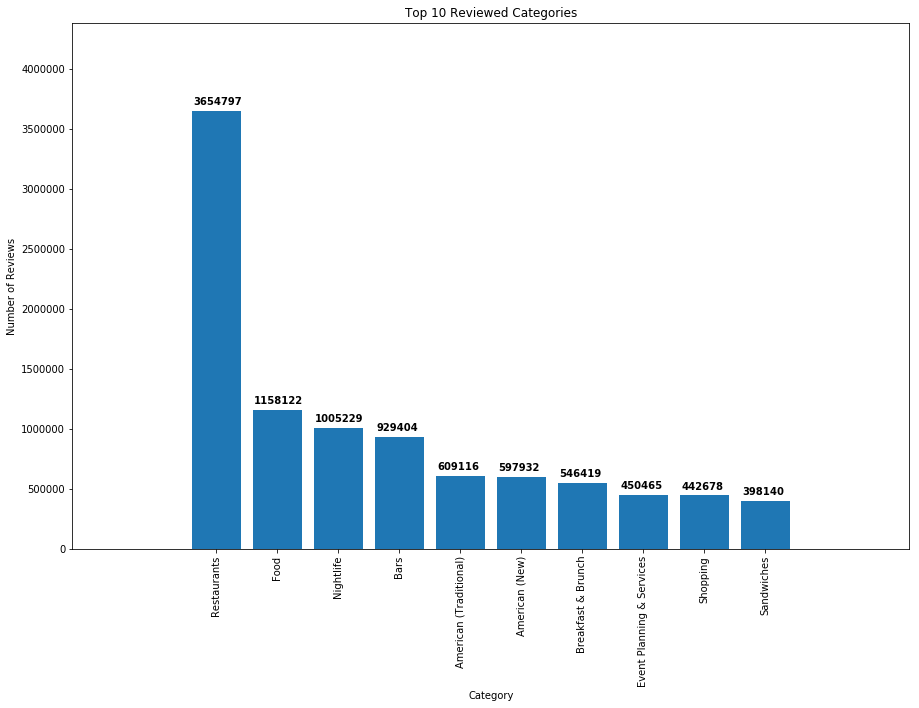

In [179]:
#attr_ctr_df = pd.DataFrame(category_review_countf[:10], columns=['x','y'])
attr_ctr_df = (category_review_countf.sort_values('review_count',ascending=False))[:10]
print((attr_ctr_df.category))
# attr_ctr_df = attr_ctr_df.sort_values('review_count',ascending=False)
# attr_ctr_df = attr_ctr_df.head(30)
plt.figure(figsize=(15, 10))
plt.bar(np.arange(10),attr_ctr_df.review_count)
plt.ylabel ('Number of Reviews')
plt.xlabel ('Category')
plt.xticks(np.arange(len(attr_ctr_df)), attr_ctr_df.category, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
for i, v in enumerate(attr_ctr_df.review_count):
    plt.text(i - 0.38, v + 50000, str(v), color='black', fontweight='bold')
plt.title('Top 10 Reviewed Categories')
plt.show()

In [180]:
category_review_countf[category_review_countf.category=='Restaurants']

,category,review_count
1006,Restaurants,3654797
